# Nitrate trend analysis

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import folium

measurements = pd.read_csv('measurements_with_postcode.csv')
measurements.Datum = pd.to_datetime(measurements.Datum, format='%Y-%m-%d')

subsidies = pd.read_csv('niedersachsen-subsidies.csv')
subsidies['postcode'] = subsidies.recipient_postcode.str.slice(3)

sub_without_measurement = [p for p in subsidies['postcode'].unique() if int(p) not in measurements['postcode'].unique()]
sub_with_measurement = [p for p in subsidies['postcode'].unique() if int(p) in measurements['postcode'].unique()]

In [2]:
measurements = pd.read_csv('~/phosphor.measurements.csv')

In [4]:
measurements.head()

,Unnamed: 0,Messtelle Nr.,Messstelle,Datum,Parameter,Kennung,Messwert,Einheit,Nitrat-Schwellenwert (Umweltqualitätsnorm),Trend Nitrat,UTM-Rechtswert,UTM-Hochwert,postcode
0,0,100001262,522 LBH 22 Hesel,2015-09-25,Nitrat,NaN,83.0,mg/l,50,kein signifikanter Trend,32408906,5903536,26835
1,1,100001262,522 LBH 22 Hesel,2015-07-01,Mittelwert Jahr,NaN,81.3,mg/l,50,kein signifikanter Trend,32408906,5903536,26835
2,2,100001262,522 LBH 22 Hesel,2015-06-16,Nitrat,NaN,79.7,mg/l,50,kein signifikanter Trend,32408906,5903536,26835
3,3,100001262,522 LBH 22 Hesel,2014-10-23,Nitrat,NaN,110.0,mg/l,50,kein signifikanter Trend,32408906,5903536,26835
4,4,100001262,522 LBH 22 Hesel,2014-07-01,Mittelwert Jahr,NaN,110.0,mg/l,50,kein signifikanter Trend,32408906,5903536,26835


In [207]:
phosphor_points = pd.read_csv('/home/aivuk/phosphor.4326.csv')
phosphor_points.Datum = pd.to_datetime(phosphor_points.Datum, format='%Y-%m-%d')


phosphor_points.groupby('Messtelle Nr.')['Messwert'].agg('mean').sort_values(ascending=False)[:20]

/home/aivuk/.virtualenvs/nabu/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Messtelle Nr.
92862013    4.041059
39112080    1.969617
37912019    1.729112
39332085    1.722788
39512011    1.522290
38952019    1.468037
94192530    1.137979
38822160    0.780757
59872190    0.629619
38592181    0.623429
59752220    0.614135
94122175    0.591483
49612329    0.556000
38822170    0.535464
49612108    0.513800
49692292    0.508685
49722951    0.486279
59942126    0.466273
37812950    0.445312
49752055    0.445140
Name: Messwert, dtype: float64

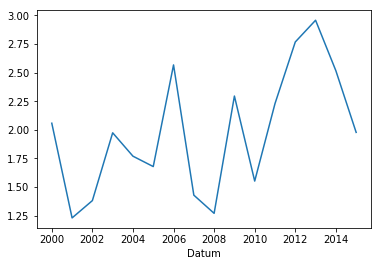

In [75]:
phosphor_points[phosphor_points['Messtelle Nr.'] == 39112080].groupby(phosphor_points.Datum.dt.year)['Messwert'].agg('mean').plot()

In [223]:
#post_phosphor =  post_phosphor['postcode'].fillna(0)
post_phosphor.loc[92862013]

48465.0

In [225]:
phosphor_points['postcode'] = phosphor_points['Messtelle Nr.'].apply(lambda x: str(int(post_phosphor.loc[x])))

In [141]:
subs_total = subsidies.groupby('postcode')['amount'].agg('sum')

In [205]:
phosphor[:20]

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [233]:
phosphor = {}

for p in subs_total.index:
    phosphor[p] = phosphor_points[phosphor_points['postcode'] ==  p]['Messwert'].agg('mean')

In [ ]:
import numpy as np
with_data = [p for p,v in phosphor.items() if not np.isnan(v)]
with_data

In [247]:
subs_total[with_data]

postcode
19273    26000235.54
21220     1516446.57
21255     4730805.41
21279     3323495.25
21339      630721.34
21368     8243200.81
21379     4689575.79
21385     5701828.51
21398     1768842.55
21423     9026634.60
21439      789021.44
21447      583015.96
21614     3968101.66
21635    10413631.26
21640     2398586.75
21680      691717.82
21682     1321355.90
21710     2025302.72
21720     2725190.97
21737     2480339.16
21745     3135881.02
21756     3375692.38
21762     3870072.73
21769    11095855.74
21770     2431798.65
21772     1898863.08
21775     6232428.37
21785     3676503.15
21787     2943683.87
26122      235830.85
            ...     
49328     5877601.92
49356     6463348.73
49406    10298822.10
49413     6446357.09
49419     8500226.45
49456     7857609.30
49457     2680656.11
49565     8297280.55
49584     4016782.94
49593     3388376.36
49594     2089707.60
49599     4257407.38
49610      789427.90
49624    10096318.26
49632     8482251.35
49638     2815177.63
4968

In [253]:
import pandas as pd
import folium
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

lr = linear_model.LinearRegression()

amount_arr = np.array([v for v in subs_total[with_data]])
meas_arr = np.array([phosphor[w] for w in with_data])
    
#lr.fit(amount_arr, meas_arr)
    

In [254]:
np.corrcoef(amount_arr, meas_arr)

array([[1.        , 0.10229032],
       [0.10229032, 1.        ]])

In [243]:
meas_arr

array([0.1287    , 0.10711747, 0.12545413, 0.10894017, 0.13310748,
       0.26712676, 0.09600862, 0.05734742, 0.13614554, 0.13719728,
       0.09348837, 0.07046154, 0.11175234, 0.21886297, 0.13701333,
       0.31361826, 0.15482456, 0.62961905, 0.16305439, 0.61413462,
       0.13533333, 0.224     , 0.46627273, 0.19259615, 0.10317308,
       0.13903846, 0.35591264, 0.33126244, 0.41523437, 0.35033702,
       0.2547541 , 0.12629559, 0.23066667, 0.54292196, 0.09267778,
       0.15142723, 0.25778237, 0.42386473, 0.27317708, 0.30909375,
       0.59148325, 0.29473171, 0.29689655, 0.35878049, 0.37768116,
       0.35383495, 1.13797872, 0.26923077, 0.17205882, 0.16543689,
       0.28076923, 0.29123223, 0.40945596, 1.71586288, 1.17803797,
       0.19620192, 0.30053659, 0.38202899, 0.44150235, 0.45133438,
       0.23252427, 0.65129888, 0.12680751, 0.12682464, 0.39517766,
       0.50868508, 0.48627907, 0.37813953, 0.15251923, 0.13226633,
       0.15313462, 0.14996271, 0.18163915, 0.13719617, 0.34189

In [178]:
phosphor_points[phosphor_points.postcode == str(26919)]

,X,Y,field_1,Betreiber,Bewirtschaftungsziel TN,Datum,Einheit,Gewässer,Gewässertyp,Gewässertyp-Nr,...,Messtelle Nr.,Messtellenart,Messwert,Orientierungswert TP,Parameter,Trend Gesamtphoshpor,Trend Gesamtstickstoff,UTM-Hochwert,UTM-Rechtswert,postcode


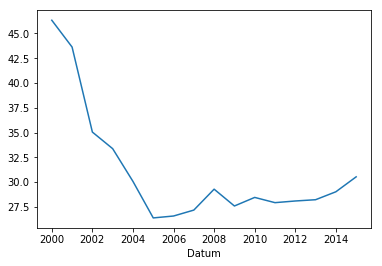

In [9]:
measurements[measurements.Parameter == 'Nitrat'].groupby(measurements.Datum.dt.year)['Messwert'].agg('mean').plot()

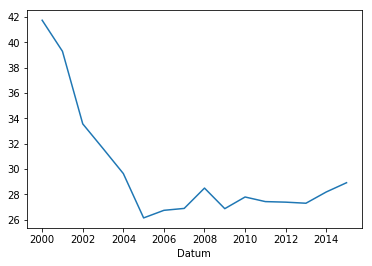

In [7]:
measurements.groupby(measurements.Datum.dt.year)['Messwert'].agg('mean').plot()

48465.0
26789.0
26871.0
26802.0
26802.0
26789.0
26639.0
26188.0
21710.0
26847.0
21737.0
26434.0
49356.0
26188.0
49163.0
26931.0
26935.0
21762.0
26871.0
26919.0


/home/aivuk/.virtualenvs/nabu/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


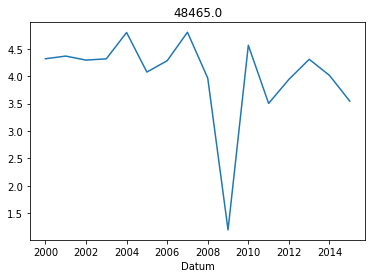

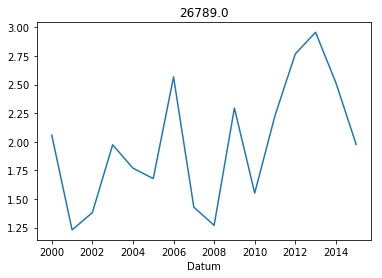

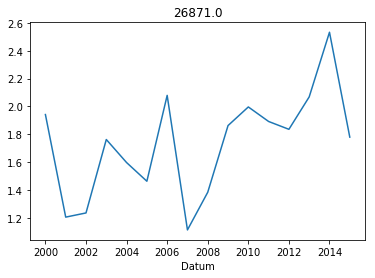

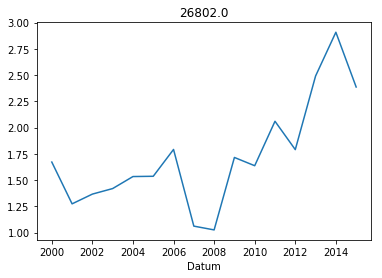

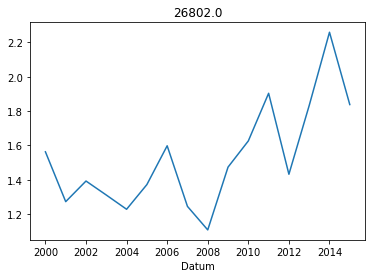

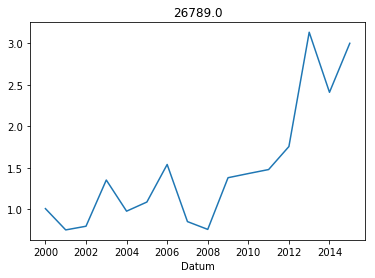

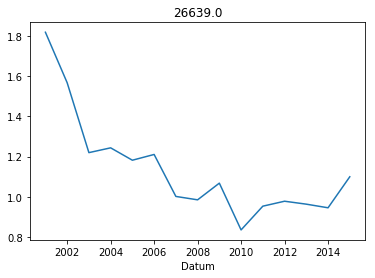

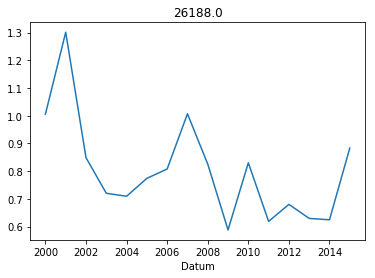

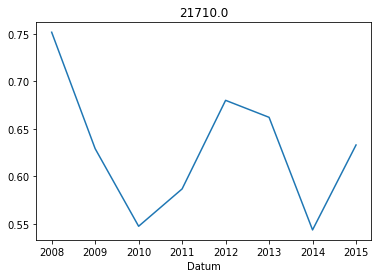

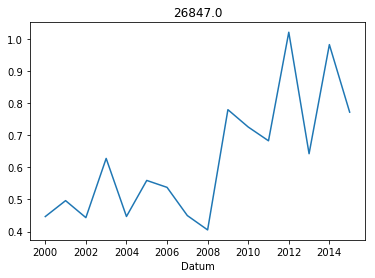

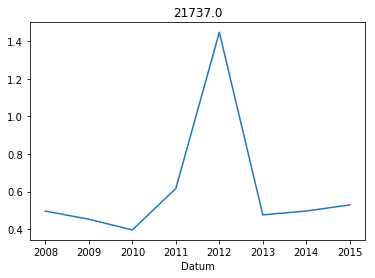

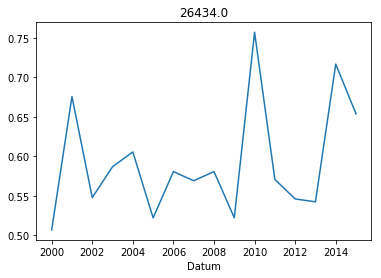

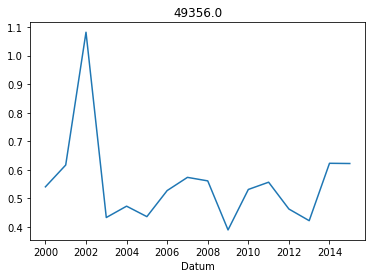

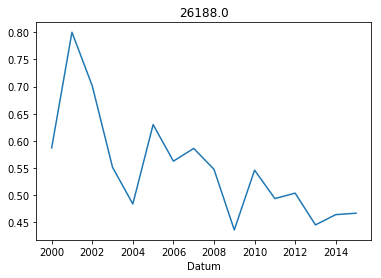

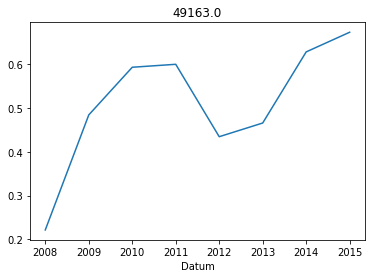

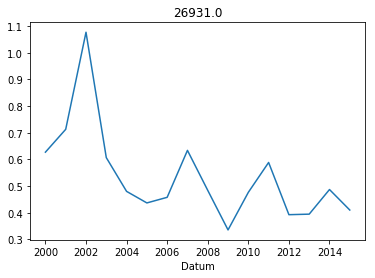

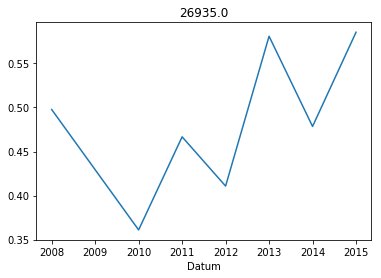

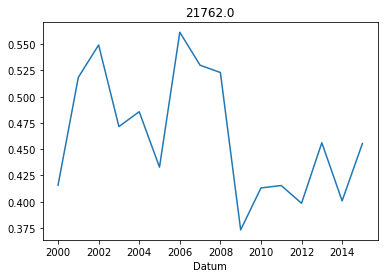

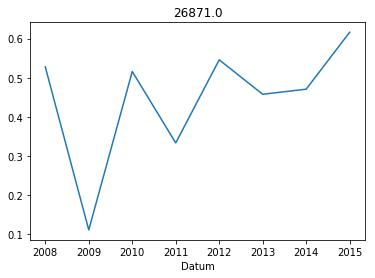

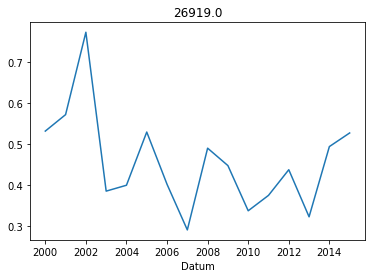

<Figure size 432x288 with 0 Axes>

In [168]:
for m, mst in phosphor_points.groupby(phosphor_points['Messtelle Nr.'])['Messwert'].agg('mean').sort_values(ascending=False)[:20].items():
    print(phosphor_points[phosphor_points['Messtelle Nr.'] == m].iloc[0]['postcode'])
    phosphor_points[phosphor_points['Messtelle Nr.'] == m].groupby(phosphor_points.Datum.dt.year)['Messwert'].agg('mean').plot(title=(phosphor_points[phosphor_points['Messtelle Nr.'] == m].iloc[0]['postcode']))
    plt.figure()

In [158]:
phosphor_points[phosphor_points['postcode'] ==  float(19273)]

,X,Y,field_1,Betreiber,Bewirtschaftungsziel TN,Datum,Einheit,Gewässer,Gewässertyp,Gewässertyp-Nr,...,Messtelle Nr.,Messtellenart,Messwert,Orientierungswert TP,Parameter,Trend Gesamtphoshpor,Trend Gesamtstickstoff,UTM-Hochwert,UTM-Rechtswert,postcode


In [115]:
phosphor_points.groupby('Messtelle Nr.')[['X', 'Y','Messwert']].agg({'Messwer': 'mean')

/home/aivuk/.virtualenvs/nabu/lib/python3.6/site-packages/pandas/core/groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Messwer                     
                      X          Y  Messwert
Messtelle Nr.                               
31642106       8.175256  52.071027  0.292316
33462034       7.921364  52.057468  0.126439
33952011       7.356458  52.327488  0.143972
34122034       7.702586  52.522260  0.118627
34242030       7.762794  52.438940  0.090980
34372017       7.495800  52.438111  0.130283
34492030       7.377688  52.418603  0.093019
35102018       7.310894  52.468648  0.128271
35512010       7.268458  52.545646  0.125446
36142075       8.248005  52.291062  0.086863
36152044       8.109620  52.261257  0.135164
36182045       8.068134  52.311807  0.149320
36192016       7.999591  52.308279  0.187767
36232072       8.004487  52.245618  0.150490
36292010       7.952651  52.323885  0.143155
36332013       7.994344  52.436119  0.145775
36342052       8.012760  52.513836  0.439369
36352069       7.935078  52.478701  0.062200
36372018       7.955617  52.560851  0.172864
36392060       7.982288  52.690796  0.168058
36392065       8.033950  52.674300  0.163529
36412087       8.082377  52.679036  0.236893
36442088       8.183820  52.717878  0.199854
36442135       8.178390  52.723235  0.118835
36472012       8.005224  52.710221  0.210610
36582064       7.798044  52.756059  0.154902
36592014       7.709646  52.718161  0.174340
36662053       7.842643  52.623606  0.120500
36692203       7.668497  52.679416  0.162379
36712014       7.602455  52.682431  0.184486
...                 ...        ...       ...
59872360       9.195066  53.681034  0.135333
59882090       9.018065  53.688158  0.103173
59882106       9.006193  53.786006  0.331262
59922170       8.839808  53.655523  0.360673
59922184       8.958284  53.747358  0.309783
59922260       8.952180  53.661238  0.139038
59942100       8.919181  53.745001  0.403551
59942126       8.898123  53.806087  0.466273
59962101       8.744322  53.786983  0.235760
92862013       7.242991  52.301460  4.041059
92862148       7.043877  52.456170  0.153426
92862250       6.962629  52.494425  0.156620
92862410       6.960741  52.563187  0.138160
92862498       7.069726  52.569762  0.203283
92862512       6.784034  52.643346  0.091062
92862534       6.738428  52.611606  0.145875
92862716       6.732726  52.561853  0.115070
92863750       7.229245  52.300788  0.101031
93512777       7.143592  53.542392  0.296897
93712810       7.460370  53.667467  0.358780
93712860       7.696605  53.685688  0.334390
93722833       7.589317  53.633566  0.264000
93912880       7.786019  53.591577  0.273177
94122175       8.015064  53.673053  0.591483
94192530       7.718387  53.461282  1.137979
94212052       7.908064  53.475104  0.294732
94212223       8.091555  53.436989  0.238536
94222056       8.186910  53.409945  0.276923
94242144       8.204291  53.387113  0.423865
94242931       8.225337  53.304497  0.230667

[354 rows x 3 columns]

In [61]:
phosphor_points[['X', 'Y', 'Messtelle Nr.']].to_csv('phosphor.mesurements.points.csv')

In [76]:
phosphor_clean_points = pd.read_csv('/home/aivuk/phosphor.clean.points.csv')

In [98]:
post_phosphor = phosphor_clean_points[['Messtelle Nr.', 'postcode']].drop_duplicates()
post_phosphor = post_phosphor.set_index('Messtelle Nr.').reindex(phosphor_points['Messtelle Nr.'].unique())

In [96]:
post_phosphor.get(92862013, {'postcode': 0})['postcode']

0

In [107]:
post_phosphor.loc[92862013]

postcode    48465.0
Name: 92862013, dtype: float64

## Postcode with nitrate measurement

In [10]:
len(sub_with_measurement)

483

## Postcode without nitrate measurement

In [11]:
len(sub_without_measurement)

324

In [72]:
def avg_trend(s):
    return s.iloc[-1] - s.iloc[0]

In [75]:
from collections import OrderedDict
d = measurements.groupby(['postcode', measurements.Datum.dt.year])['Messwert'].agg(OrderedDict([('Messwert','mean')]))

/home/aivuk/.virtualenvs/nabu/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


In [85]:
changes = d.groupby('postcode').apply(avg_trend).sort_values(by='Messwert', ascending=False)

In [13]:
trend = measurements.postcode.apply(avg_trend)

In [35]:
trend_df = pd.DataFrame({'postcode': measurements.postcode.unique(), 'value': t})
trend_df = trend_df.sort_values(by='value', ascending=False)

## Histogram of change

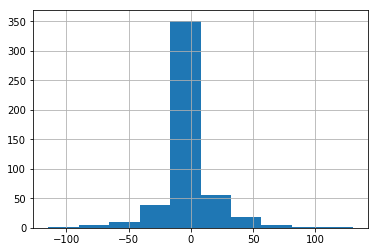

In [87]:
changes['Messwert'].hist()

## Overall average change along the years

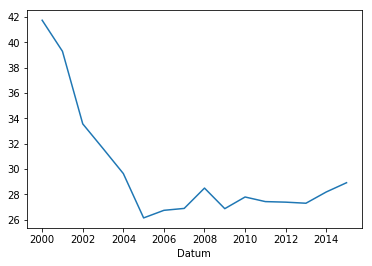

In [97]:
measurements.groupby(measurements.Datum.dt.year)['Messwert'].agg('mean').plot()

## Top 20 postcode with changes

In [98]:
changes[:20]

,Messwert
postcode,
29320,130.060000
29649,89.206667
21644,72.600000
31595,62.780000
38542,57.450000
49777,56.995000
27259,55.670000
38229,55.556000
29378,52.835357


/home/aivuk/.virtualenvs/nabu/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


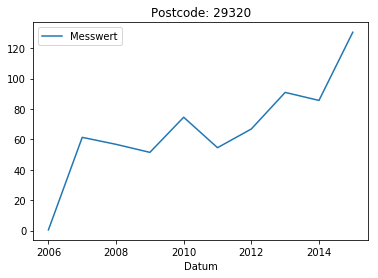

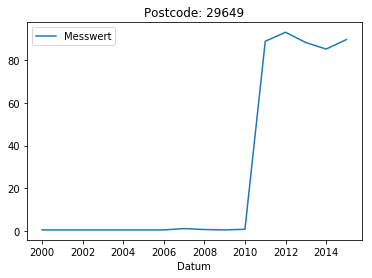

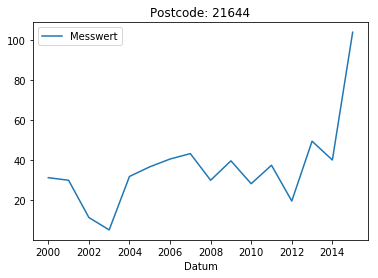

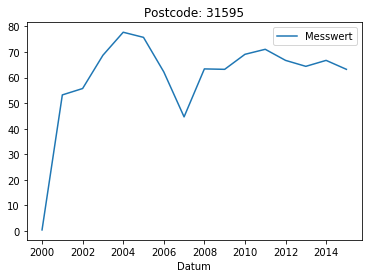

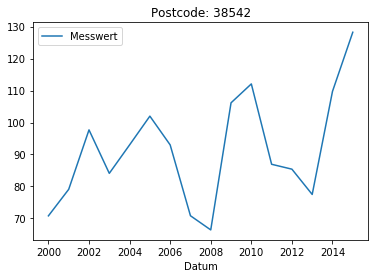

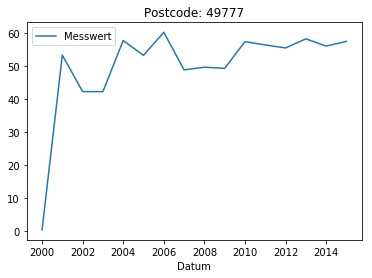

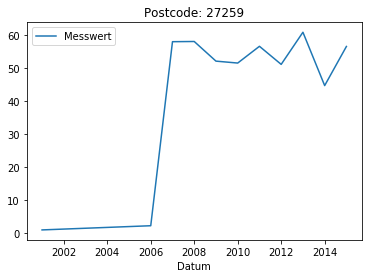

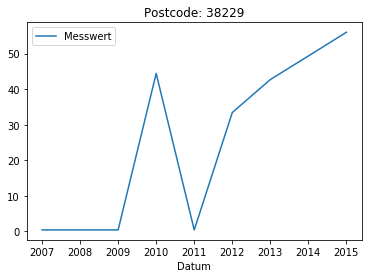

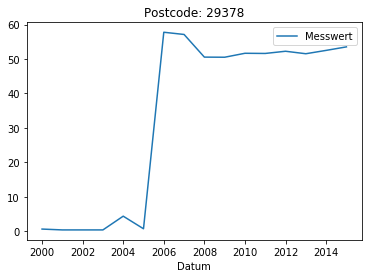

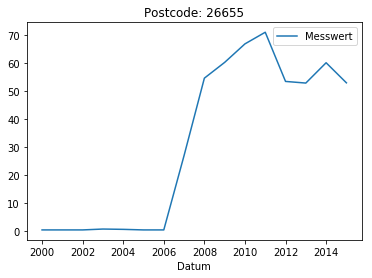

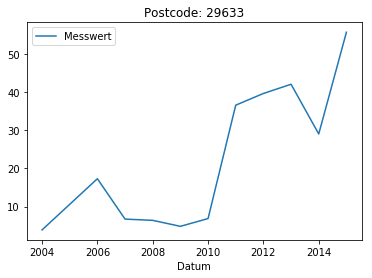

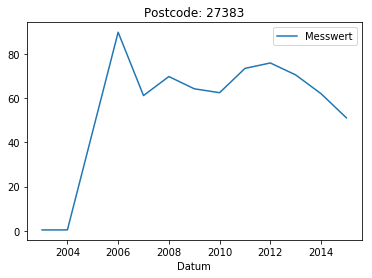

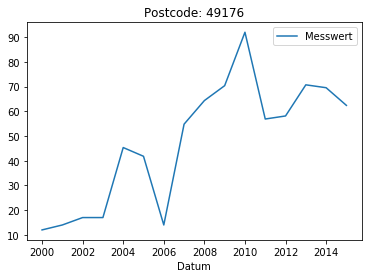

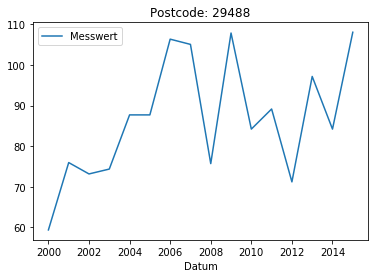

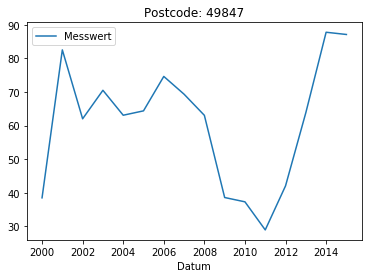

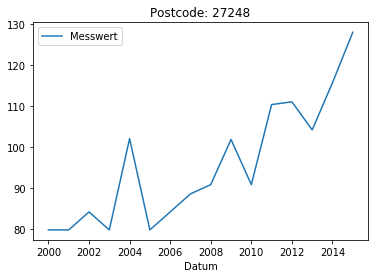

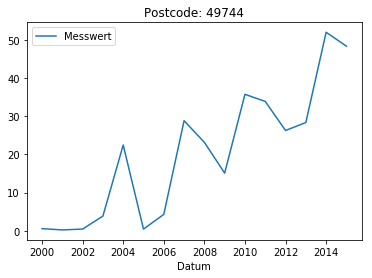

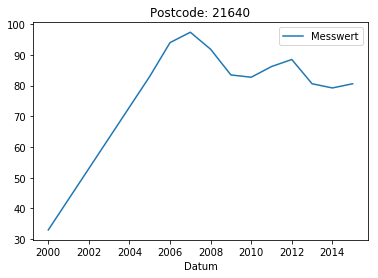

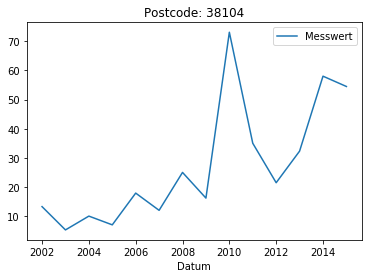

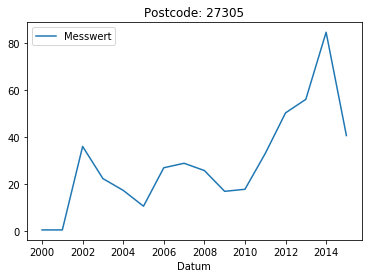

<Figure size 432x288 with 0 Axes>

In [108]:
for postcode in changes.index[:20]:
    measurements[measurements.postcode == postcode].groupby(measurements.Datum.dt.year)['Messwert'].agg('mean').plot(legend=True, title='Postcode: {}'.format(postcode))
    plt.figure()

In [137]:
ns_geo = './ns_pz.geojson'


m = folium.Map(location=[52.825495, 9.279066], tiles='Stamen Terrain', zoom_start=8)
df = pd.DataFrame({'postcode': [str(c) for c in changes.index], 'Messwert': changes['Messwert'].values})
    
m.choropleth(
    geo_data=ns_geo,
    name='total subsidy',
    data=df,
    columns=['postcode', 'Messwert'],
    key_on='feature.properties.postcode',
    fill_color='YlOrRd',
    fill_opacity=0.9,
    line_opacity=0.6,
    highlight=True,
    legend_name='Changes Nitrate level'
)

folium.LayerControl().add_to(m)
m.save('nitrate-changes.html')

In [123]:
changes[:20]['Messwert'].values

array([130.06      ,  89.20666667,  72.6       ,  62.78      ,
        57.45      ,  56.995     ,  55.67      ,  55.556     ,
        52.83535714,  52.47333333,  51.9425    ,  50.62857143,
        50.4       ,  48.69333333,  48.60857143,  48.3       ,
        47.81      ,  47.6       ,  41.19666667,  40.27333333])

In [ ]:
folium.PolyLine()

In [140]:
import json

ns_map = json.load(open(ns_geo))

In [185]:
pols = [(f['properties']['postcode'], f) for f in ns_map['features'] if f['properties']['postcode'] in df['postcode'].values]

In [157]:
ns_map['features'][0]['properties']['postcode'] in df['postcode']

False

In [179]:
m = folium.Map(location=[52.825495, 9.279066], tiles='Stamen Terrain', zoom_start=8)
new_pol = folium.RegularPolygonMarker(pols[2]['geometry']['coordinates'])

In [199]:
ps = []

for p, geo in pols:
    ps += [folium.GeoJson(
                data={
                    'type': 'Polygon',
                    'coordinates': geo['geometry']['coordinates']
                }
            )]

    ps[-1].add_child(folium.Popup('<b>{}</b><p>Change:{}'.format(p, df[df['postcode'] == p]['Messwert'][0].v)))
    ps[-1].add_to(m)
    
m.save('pol.html')

KeyError: 0

In [192]:
df

,Messwert,postcode
0,130.060000,29320
1,89.206667,29649
2,72.600000,21644
3,62.780000,31595
4,57.450000,38542
5,56.995000,49777
6,55.670000,27259
7,55.556000,38229
8,52.835357,29378
9,52.473333,26655


In [3]:
nitrate_points = pd.read_csv('/home/aivuk/measurements_with_postcode-4326.csv')
nitrate_points.Datum = pd.to_datetime(nitrate_points.Datum, format='%Y-%m-%d')


In [39]:

messtelle_values = nitrate_points[nitrate_points.Datum.dt.year == 2015][['X','Y', 'Messtelle Nr.', 'Messwert']].groupby('Messtelle Nr.').agg({'Messwert': 'mean'})

In [40]:
messtelle_coords = nitrate_points[['X','Y','postcode','Messtelle Nr.']].drop_duplicates().set_index('Messtelle Nr.')

In [41]:
subsidies.scheme.unique()

array(['EGFL: Direktzahlungen', 'ELER: Agrarumweltmaßnahmen',
       'ELER: Natur- und Gewässerschutz auf landwirtschaftlichen Flächen',
       'ELER: Ausgleichszulage benachteiligte Gebiete',
       'ELER: Dienstleistungseinrichtungen',
       'ELER: Berufsbildungs- und Informationsmaßnahmen',
       'ELER: Nicht produktive Investitionen auf Waldflächen',
       'ELER: Erhaltung und Verbesserung des ländlichen Erbes',
       'ELER: Modernisierung landwirtschaftlicher Betriebe',
       'ELER: Inanspruchnahme von Beratungsdiensten',
       'EGFL: Beihilfen im Bienenzuchtsektor', 'EGFL: Schulmilchprogramm',
       'ELER: Kompetenzentwicklung lokale Entwicklungsstrategien',
       'ELER: Lokale Entwicklungsstrategien (LEADER)',
       'ELER: Bildungs- und Informationsmaßnahmen im ländlichen Raum',
       'ELER: Dorferneuerung und -entwicklung',
       'ELER: Erstaufforstung landwirtschaftlicher Flächen',
       'ELER: Erhöhung der Wertschöpfung land- und forstwirtschaftlicher Erzeugnisse'

In [42]:
subs2015 = subsidies[(subsidies.year == 2015) & (subsidies.scheme.isin(['EGFL: Direktzahlungen', 'EGFL: Umverteilungsprämie', 'EGFL: Erstattung nicht genutzter Mittel der Krisenreserve']))].groupby('postcode').agg({'amount': 'sum'})

In [60]:
subsidies.scheme.unique()

array(['EGFL: Direktzahlungen', 'ELER: Agrarumweltmaßnahmen',
       'ELER: Natur- und Gewässerschutz auf landwirtschaftlichen Flächen',
       'ELER: Ausgleichszulage benachteiligte Gebiete',
       'ELER: Dienstleistungseinrichtungen',
       'ELER: Berufsbildungs- und Informationsmaßnahmen',
       'ELER: Nicht produktive Investitionen auf Waldflächen',
       'ELER: Erhaltung und Verbesserung des ländlichen Erbes',
       'ELER: Modernisierung landwirtschaftlicher Betriebe',
       'ELER: Inanspruchnahme von Beratungsdiensten',
       'EGFL: Beihilfen im Bienenzuchtsektor', 'EGFL: Schulmilchprogramm',
       'ELER: Kompetenzentwicklung lokale Entwicklungsstrategien',
       'ELER: Lokale Entwicklungsstrategien (LEADER)',
       'ELER: Bildungs- und Informationsmaßnahmen im ländlichen Raum',
       'ELER: Dorferneuerung und -entwicklung',
       'ELER: Erstaufforstung landwirtschaftlicher Flächen',
       'ELER: Erhöhung der Wertschöpfung land- und forstwirtschaftlicher Erzeugnisse'

In [63]:
ns_geo = './ns_pz.geojson'

m = folium.Map(location=[52.825495, 9.279066], tiles='Stamen Terrain', zoom_start=8)

messtelle_values = nitrate_points[nitrate_points.Datum.dt.year == 2015][['X','Y', 'Messtelle Nr.', 'Messwert']].groupby('Messtelle Nr.').agg({'Messwert': 'mean'})
messtelle_coords = nitrate_points[['X','Y','postcode','Messtelle Nr.']].drop_duplicates().set_index('Messtelle Nr.')

subs2015 = subsidies[(subsidies.year == 2015) & (subsidies.scheme.isin(['EGFL: Direktzahlungen', 'EGFL: Umverteilungsprämie', 'EGFL: Erstattung nicht genutzter Mittel der Krisenreserve']))].groupby('postcode').agg({'amount': 'sum'})
subs2014 =subsidies[(subsidies.year == 2014) & (subsidies.scheme.isin(['EGFL: Direktzahlungen']))].groupby('postcode').agg({'amount': 'sum'}) 
subs2016 = subsidies[(subsidies.year == 2016) & (subsidies.scheme.isin(['EGFL: Basisprämie', 'EGFL: Greening-Prämie', 'EGFL: Umverteilungsprämie', 'EGFL: Erstattung nicht genutzter Mittel der Krisenreserve']))].groupby('postcode').agg({'amount': 'sum'})

subs = subs2016
df = pd.DataFrame({'postcode': [str(c) for c in subs.index], 'Messwert': subs['amount'].values})
    
m.choropleth(
    geo_data=ns_geo,
    name='total subsidy',
    data=df,
    columns=['postcode', 'Messwert'],
    key_on='feature.properties.postcode',
    fill_color='YlOrRd',
    fill_opacity=1,
    line_opacity=0.6,
    highlight=True,
    legend_name='2016 - Basisprämie, Greening-Prämie, Umverteilung, nicht genutzter Mittel der Krisenreserve'
)

folium.LayerControl().add_to(m)

In [80]:
years = nitrate_points.Datum.dt.year.unique()
for year in years:
    nitrate_points[nitrate_points.Datum.dt.year == year].groupby('postcode')['Messwert'].agg('mean').sort_values(ascending=False).to_csv('nitrate-average-{}.csv'.format(year), index='postcode', header=['nitrate'])

In [104]:
top20 = list(nitrate_points[nitrate_points.Datum.dt.year.isin([2013,2014,2015])].groupby('postcode')['Messwert'].agg('mean').sort_values(ascending=False)[:20].index)

In [105]:
top20

[38459,
 49770,
 38124,
 27628,
 31228,
 38176,
 27248,
 31603,
 31638,
 21755,
 38542,
 29565,
 21629,
 29485,
 27333,
 48499,
 29320,
 29488,
 38474,
 38442]

In [107]:
nitrate_points[nitrate_points.postcode.isin(top20)].groupby(['postcode', nitrate_points.Datum.dt.year])['Messwert'].agg('mean').unstack(level=1).to_csv('nitrate-trend-top20.csv')

In [114]:
subsidies[subsidies.postcode.isin(map(str,top20))].groupby('postcode')['amount'].agg('sum').sort_values(ascending=False).to_csv('top20-subsidies.csv')

In [58]:
def point_color(v):
    if v < 10:
        return '#cdcdcd'
    elif v > 10 and v <= 37.5:
        return '#ffff00'
    elif v > 37.5 and v <= 50:
        return '#ffa900'
    else:
        return '#ff0000'
    
for mst in messtelle_coords.index:
    if mst in messtelle_values.index:
        pos = list(messtelle_coords.loc[mst][['X','Y']])[::-1]
        value = messtelle_values.loc[mst]['Messwert']
        c = point_color(value)
        postcode = str(int(messtelle_coords.loc[mst]['postcode']))
        amount = locale.currency(subs.loc[postcode]['amount'] if postcode in subs.index else 0, grouping=True)
        folium.CircleMarker(pos, fill=True, popup="<b>Nitrate value:</b> {:02f} mg/L <p> <b>Postcode:</b> {} <p> <b>Subsidies Total: </p> {}".format(value, postcode, amount), color=c, radius=3, fill_opacity=0.7, fill_color=c).add_to(m)

In [64]:
m.save('2016.html')

In [49]:
import locale

locale.setlocale( locale.LC_ALL, '' )
locale.currency(2332233223232323.2222222222222222, grouping=True)

'2.332.233.223.232.323,00 €'

In [33]:
subs2014

,amount
postcode,
19273,5791923.18
21217,573463.74
21218,454127.90
21220,474528.23
21224,852131.86
21227,83316.81
21228,28488.02
21244,645354.79
21255,1470441.45
